# Require Libraries

In [1]:
# for creat update files reading files

import pandas as pd
import numpy as np

# for model selection ,split data

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
 
# for classification problem required matrics    
    
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# for preprocession , scaling

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# removing not required warnings
import warnings 
warnings.filterwarnings("ignore")

# for visualization

import matplotlib.pyplot as plt
import seaborn as sns

# for outliers

from scipy.stats import zscore

# Problem Statement

In [2]:
# - To Predict Brain Stroke or not if yes '1' if no '0'

# Data Gathering

In [3]:
df = pd.read_csv('brain_stroke.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [4]:
df.shape

(4981, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


# EDA (Exploratory Data Analysis)

In [6]:
df.isna().sum()                # no null values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## 1.   gender      D type object convert it

In [7]:
df['gender'] = df['gender'].replace({'Male': 1 , 'Female': 0})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 428.2+ KB


## 2.ever_married 

In [9]:
df['ever_married'] = df['ever_married'].replace({'Yes' : 1 , 'No': 0})
df['ever_married']

0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    1
4978    1
4979    1
4980    1
Name: ever_married, Length: 4981, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 428.2+ KB


## work_type

In [11]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [12]:
df['work_type'] = df['work_type'].replace({'Private' : 1, 'Self-employed' : 2 , 'Govt_job' : 3 , 'children' : 4})
df['work_type']

0       1
1       1
2       1
3       2
4       1
       ..
4976    1
4977    1
4978    3
4979    1
4980    1
Name: work_type, Length: 4981, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 428.2+ KB


## Residence_type

In [14]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [15]:
df['Residence_type'] = df['Residence_type'].replace({'Urban' : 1, 'Rural' : 2})
df['Residence_type']

0       1
1       2
2       1
3       2
4       1
       ..
4976    2
4977    1
4978    2
4979    2
4980    1
Name: Residence_type, Length: 4981, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 428.2+ KB


## smoking_status

In [17]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [18]:
df['smoking_status'] = df['smoking_status'].replace({'formerly smoked': 1,'never smoked':2,'smokes':3,'Unknown':4})
df['smoking_status']

0       1
1       2
2       3
3       2
4       1
       ..
4976    1
4977    3
4978    3
4979    3
4980    2
Name: smoking_status, Length: 4981, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


In [20]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.416382,43.419859,0.096165,0.055210,0.658502,1.825336,1.491668,105.943562,28.498173,2.584019,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,1.101664,0.499981,45.075373,6.790464,1.092516,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000,1.000000,55.120000,14.000000,1.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,1.000000,77.230000,23.700000,2.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.850000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,2.000000,113.860000,32.600000,4.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,2.000000,271.740000,48.900000,4.000000,1.000000


<AxesSubplot:xlabel='avg_glucose_level'>

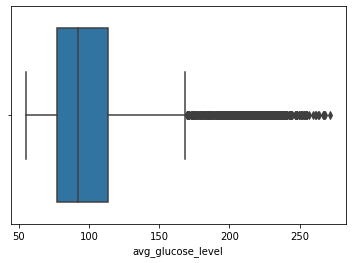

In [21]:
sns.boxplot(x = df['avg_glucose_level'])

In [22]:
# for outliers import zcore
# from scipy.stats import zscore

In [23]:
def get_outliers(column_name):
    outliers = []
    z_val = zscore(df[column_name])
    index = np.where(np.abs(z_val) > 3)[0]
    print(df[column_name].iloc[index])
    outliers.append(index)
    return print(outliers)

In [24]:
get_outliers('avg_glucose_level')

27      252.72
38      243.58
102     259.63
103     249.31
111     263.32
157     271.74
160     242.52
181     250.89
203     247.51
213     243.53
258     242.30
285     243.50
337     251.60
492     247.69
683     250.20
712     254.60
978     254.63
981     246.34
1021    251.46
1112    267.76
1275    246.53
1326    244.28
1343    251.99
1411    253.16
1499    242.84
2015    249.29
2034    242.94
2119    247.48
2281    266.59
2440    243.59
2500    250.80
2553    255.17
2866    267.61
3100    248.37
3149    263.56
3767    247.97
3955    248.24
4058    254.95
4146    247.87
4155    261.67
4168    256.74
4293    244.30
4401    242.62
4591    243.52
4660    267.60
4709    253.86
4898    243.73
4933    260.85
4961    253.93
Name: avg_glucose_level, dtype: float64
[array([  27,   38,  102,  103,  111,  157,  160,  181,  203,  213,  258,
        285,  337,  492,  683,  712,  978,  981, 1021, 1112, 1275, 1326,
       1343, 1411, 1499, 2015, 2034, 2119, 2281, 2440, 2500, 2553, 2866,
     

In [37]:
q1 = df["avg_glucose_level"].quantile(0.25)
print("Q1 :", q1)

q2 = df["avg_glucose_level"].quantile(0.50)
print("Q2 :", q2)

q3 = df["avg_glucose_level"].quantile(0.75)
print("Q3 :", q3)

iqr = q3 - q1
print("IQR", iqr)

upper_tail = q3 + 2.5 * iqr
print("Upper Tail :", upper_tail)

lower_tail = q1 - 2.5 * iqr
print("Lower Tail :", lower_tail)
                               
median_age = df["avg_glucose_level"].loc[df["avg_glucose_level"] <= upper_tail].median()
print('Without outlier values median : ',median_age)

df["avg_glucose_level"].loc[df["avg_glucose_level"] > upper_tail] = median_age

Q1 : 77.23
Q2 : 91.85
Q3 : 113.86
IQR 36.629999999999995
Upper Tail : 205.435
Lower Tail : -14.344999999999985
Without outlier values median :  91.85


<AxesSubplot:>

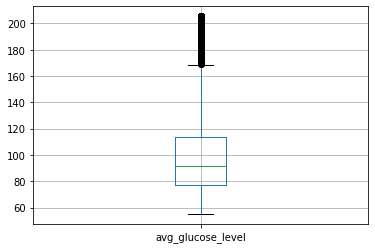

In [36]:
df[["avg_glucose_level"]].boxplot()

In [40]:
# now we are applying standardization to remove outliers from all features

In [45]:
x = df.drop(['stroke'],axis = 1 )
y = df['stroke']

In [46]:
df_std = StandardScaler()          # object created with class
df_std.fit(x)                     #  training only with x  features 

StandardScaler()

In [48]:
std_t = df_std.transform(x)

In [49]:
df_std_t = pd.DataFrame(std_t,columns = x.columns)

In [50]:
df_std_t

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.183909,1.040584,-0.326186,4.136753,0.720137,-0.749248,-0.983473,2.443725,1.193238,-1.450027
1,1.183909,1.614270,-0.326186,4.136753,0.720137,-0.749248,1.016804,0.033700,0.589390,-0.534617
2,-0.844660,0.246250,-0.326186,-0.241735,0.720137,-0.749248,-0.983473,1.615358,0.869222,0.380793
3,-0.844660,1.570141,3.065738,-0.241735,0.720137,0.158561,1.016804,1.685348,-0.662492,-0.534617
4,1.183909,1.658400,-0.326186,-0.241735,0.720137,-0.749248,-0.983473,1.978140,0.073909,-1.450027
...,...,...,...,...,...,...,...,...,...,...
4976,1.183909,-0.106788,-0.326186,-0.241735,-1.388624,-0.749248,1.016804,-0.832567,0.191733,-1.450027
4977,1.183909,-0.150917,-0.326186,-0.241735,0.720137,-0.749248,-0.983473,2.097775,0.383197,0.380793
4978,-0.844660,0.069731,3.065738,-0.241735,0.720137,1.066370,1.016804,-0.230273,0.486294,0.380793
4979,1.183909,-0.150917,-0.326186,-0.241735,0.720137,-0.749248,1.016804,-0.498605,0.221189,0.380793


<AxesSubplot:>

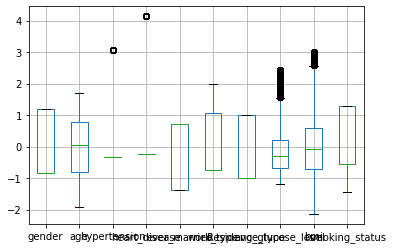

In [51]:
df_std_t.boxplot()

<AxesSubplot:>

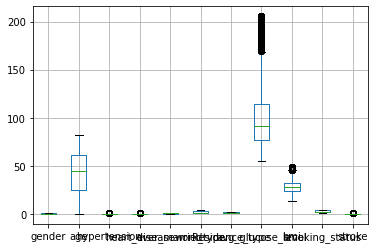

In [29]:
df.boxplot()

<AxesSubplot:>

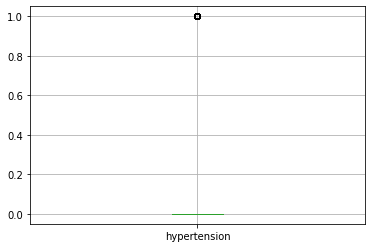

In [31]:
df[["hypertension"]].boxplot()

<AxesSubplot:>

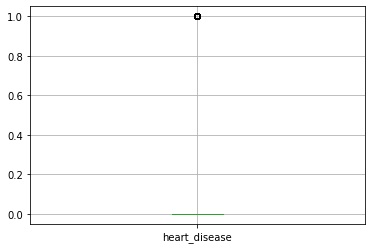

In [32]:
df[["heart_disease"]].boxplot()

<AxesSubplot:>

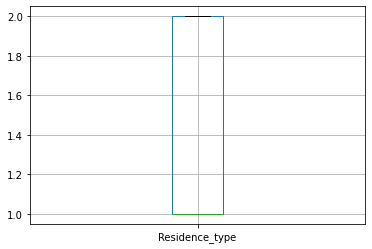

In [33]:
df[["Residence_type"]].boxplot()

<AxesSubplot:>

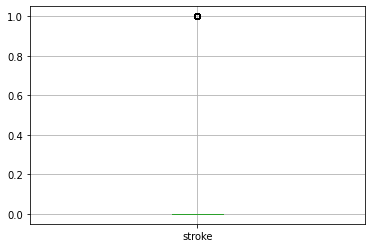

In [34]:
df[["stroke"]].boxplot()

<AxesSubplot:>

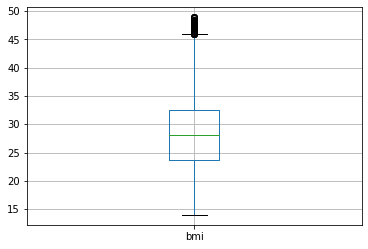

In [35]:
df[["bmi"]].boxplot()